In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/Colab_Pokemon'

In [15]:
import os
dataset_path = '/content/drive/MyDrive/Colab_Pokemon'
if os.path.exists(dataset_path):
    print("Dataset directory exists.")
else:
    print("Dataset directory does not exist.")

Dataset directory exists.


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Specify the path to your dataset
dataset_path = '/content/drive/MyDrive/Colab_Pokemon'
# Set up ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)
# Set up the training generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
# Set up ImageDataGenerator for validation data
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)
# Set up the validation generator
validation_generator = validation_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 56 images belonging to 1 classes.
Found 14 images belonging to 1 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
num_classes = 2
# Model Definition
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))
# Loss Function and Optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)
# Evaluation
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
2/2 [==============================] - 8s 3s/step - loss: 4.5238 - accuracy: 0.5714 - val_loss: 9.2048 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 7s 4s/step - loss: 12.5637 - accuracy: 0.4107 - val_loss: 13.2099 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 6s 3s/step - loss: 51.0704 - accuracy: 0.5179 - val_loss: 57.4387 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 8s 5s/step - loss: 103.0561 - accuracy: 0.6250 - val_loss: 89.0376 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 6s 3s/step - loss: 264.0343 - accuracy: 0.5357 - val_loss: 98.4693 - val_accuracy: 0.7857
Epoch 6/10
2/2 [==============================] - 6s 3s/step - loss: 537.4225 - accuracy: 0.4464 - val_loss: 231.3000 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 8s 5s/step - loss: 1038.7067 - accuracy: 0.5357 - val_loss: 377.8535 - val_accuracy: 1.0000
Epoch 8/10
2/2 [==

1/1 [==============================] - 0s 413ms/step


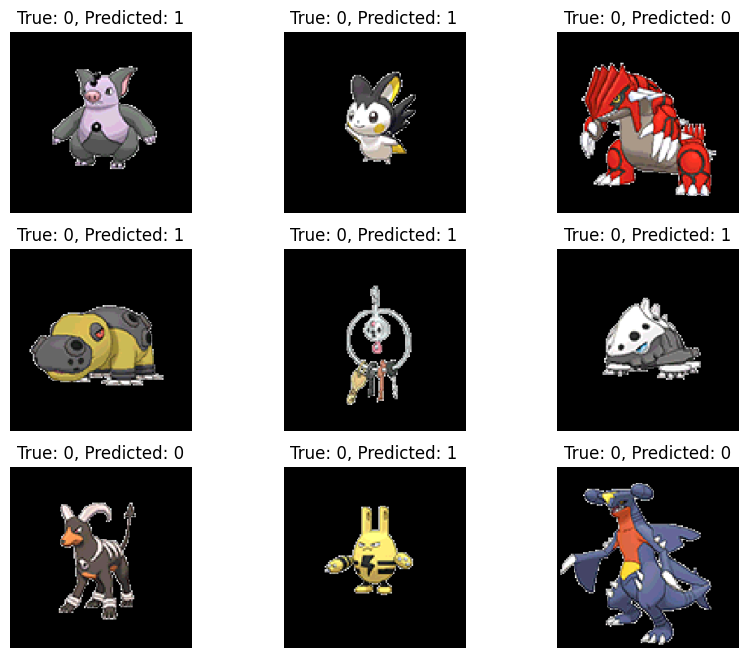

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# Get a batch of images and their corresponding labels from the validation generator
images, labels = validation_generator.next()
# Make predictions on the batch of images
predictions = model.predict(images)
# Convert one-hot encoded labels to class indices
true_classes = np.argmax(labels, axis=1)
predicted_classes = np.argmax(predictions, axis=1)
# Display a few images with their true and predicted classes
plt.figure(figsize=(10, 8))
for i in range(min(9, len(true_classes))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'True: {true_classes[i]}, Predicted: {predicted_classes[i]}')
    plt.axis('off')
plt.show()